<br>
<center>
<img src="https://raw.githubusercontent.com/elaynelemos/prediction-of-orders-dmc/main/assets/img/univasf-logo.png" width=200>
<h3>
    UNIVERSIDADE FEDERAL DO VALE DO SÃO FRANCISCO
    <br>COLEGIADO DE ENGENHARIA DE COMPUTAÇÃO
</h3>

<h3>Orientador</h3>
<span>Prof. Dr. Rosalvo Ferreira de Oliveira Neto</span>

<h3>Discentes</h3>
<span>Anísio Pereira Batista Filho
<br>Edjair Aguiar Gomes Filho
<br>Elayne Rute Lessa Lemos</span>
</center>
<br><br>

## Regressão com Redes Neurais

Projeto em: [https://github.com/anisiobfilho/regression_neuralnetworks_univasf](https://github.com/anisiobfilho/regression_neuralnetworks_univasf)

### Importação das bases de dados

In [1]:
import pandas as pd

repo_url = 'https://raw.githubusercontent.com/anisiobfilho/regression_neuralnetworks_univasf/main'

In [2]:
X_train = pd.read_csv(f'{repo_url}/data/preprocessed/ic_house_pred_train_X.csv')
y_train = pd.read_csv(f'{repo_url}/data/preprocessed/ic_house_pred_train_y.csv')
y_train_log = pd.read_csv(f'{repo_url}/data/preprocessed/ic_house_pred_train_y_log.csv')

X_test = pd.read_csv(f'{repo_url}/data/preprocessed/ic_house_pred_test_X.csv')
y_test = pd.read_csv(f'{repo_url}/data/preprocessed/ic_house_pred_test_y.csv')
y_test_log = pd.read_csv(f'{repo_url}/data/preprocessed/ic_house_pred_test_y_log.csv')

In [3]:
X_train.sample(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_ausente,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_ausente,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_ausente,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_ausente,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_ausente,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Condition2_PosA,Condition2_RRNn,Electrical_Mix,Exterior1st_ImStucc,RoofMatl_Membran
709,0.235294,0.169092,0.040197,0.666667,0.5,0.695652,0.300000,0.248186,0.097803,0.0,0.119863,0.136170,0.175310,0.426150,0.0,0.309721,0.0,0.0,0.666667,0.5,0.500,0.5,0.583333,0.333333,0.618182,0.5,0.342736,0.000000,0.078611,0.0,0.0,0.0,0.0,0.0,0.272727,0.50,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.235294,0.291096,0.046246,0.777778,0.5,0.927536,0.833333,0.029028,0.000000,0.0,0.601884,0.230115,0.256999,0.233414,0.0,0.301809,0.0,0.0,0.666667,0.5,0.375,0.5,0.416667,0.333333,0.909091,0.5,0.355430,0.219370,0.226691,0.0,0.0,0.0,0.0,0.0,0.909091,0.00,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
929,0.235294,0.133562,0.031891,0.555556,0.5,0.927536,0.833333,0.011611,0.000000,0.0,0.420377,0.160720,0.154429,0.384019,0.0,0.276187,0.0,0.0,0.666667,0.5,0.375,0.5,0.416667,0.333333,0.909091,0.5,0.326516,0.116686,0.115174,0.0,0.0,0.0,0.0,0.0,0.454545,0.75,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Converte em aray numpy a variável alvo
y_train = y_train.SalePrice.to_numpy()
y_train_log = y_train_log.SalePrice.to_numpy()

y_test = y_test.SalePrice.to_numpy()
y_test_log = y_test_log.SalePrice.to_numpy()

### Treinamento dos modelos

#### Métodos auxiliares

In [5]:
from keras.models  import Sequential
from keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam

def create_model(features, hidden, learning_rate):
    input_neuron, hidden_neuron, output_neuron = features, hidden, 1

    model = Sequential([     
        InputLayer(input_neuron),
        Dense(hidden_neuron, activation="relu"),
        Dense(output_neuron, activation="sigmoid")
    ])

    print(f'Learning Rate = {learning_rate}\nNeurônios na camada escondida = {hidden}')
    print(model.summary(),'\n\n')

    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss="mse")

    return model

#### Estabelecimento de parâmetros variáveis

In [6]:
hidden_layer_sizes = [int(X_train.shape[-1]**(1/4)), int(X_train.shape[-1]**(1/2)), X_train.shape[-1]]
learning_rates = [0.001, 0.04, 0.1]

combined_parameters = [ 
    {'lr': learning_rate, 'hidden_neurons': hidden} \
        for hidden in hidden_layer_sizes for learning_rate in learning_rates
]
combined_parameters

[{'hidden_neurons': 4, 'lr': 0.001},
 {'hidden_neurons': 4, 'lr': 0.04},
 {'hidden_neurons': 4, 'lr': 0.1},
 {'hidden_neurons': 16, 'lr': 0.001},
 {'hidden_neurons': 16, 'lr': 0.04},
 {'hidden_neurons': 16, 'lr': 0.1},
 {'hidden_neurons': 261, 'lr': 0.001},
 {'hidden_neurons': 261, 'lr': 0.04},
 {'hidden_neurons': 261, 'lr': 0.1}]

#### Estabelecimento de parâmetros estáticos

In [7]:
batch_size = 16
epochs = 1000
Log = {}

#### Criação dos modelos

In [8]:
models = {
  (item['lr'], item['hidden_neurons']): create_model(X_train.shape[-1], item['hidden_neurons'], item['lr']) \
      for item in combined_parameters
}

models_log = {
  (item['lr'], item['hidden_neurons']): create_model(X_train.shape[-1], item['hidden_neurons'], item['lr']) \
      for item in combined_parameters
}

Learning Rate = 0.001
Neurônios na camada escondida = 4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 1048      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 1,053
Trainable params: 1,053
Non-trainable params: 0
_________________________________________________________________
None 


Learning Rate = 0.04
Neurônios na camada escondida = 4
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 1048      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 1,053
Trainable params: 1,053
N

#### Treinamento de modelos sem transformação da variável alvo



In [9]:
for pair in models.keys():
    print(f'Treinando com:\nLearning Rate = {pair[0]}\nNeurônios na camada escondida = {pair[1]}\n')
    Log[pair] = models[pair].fit(X_train, y_train, batch_size=batch_size, epochs=epochs)
    print('\n\n')

Streaming output truncated to the last 5000 lines.
64/64 [==============================] - 0s 4ms/step - loss: 38892503040.0000
Epoch 510/1000
64/64 [==============================] - 0s 4ms/step - loss: 38892507136.0000
Epoch 511/1000
64/64 [==============================] - 0s 4ms/step - loss: 38892503040.0000
Epoch 512/1000
64/64 [==============================] - 0s 5ms/step - loss: 38892507136.0000
Epoch 513/1000
64/64 [==============================] - 0s 5ms/step - loss: 38892507136.0000
Epoch 514/1000
64/64 [==============================] - 0s 5ms/step - loss: 38892498944.0000
Epoch 515/1000
64/64 [==============================] - 0s 5ms/step - loss: 38892507136.0000
Epoch 516/1000
64/64 [==============================] - 0s 4ms/step - loss: 38892503040.0000
Epoch 517/1000
64/64 [==============================] - 0s 4ms/step - loss: 38892507136.0000
Epoch 518/1000
64/64 [==============================] - 0s 4ms/step - loss: 38892507136.0000
Epoch 519/1000
64/64 [============

#### Treinamento de modelos com transformação da variável alvo



In [10]:
for pair in models_log.keys():
    print(f'Treinando com:\nLearning Rate = {pair[0]}\nNeurônios na camada escondida = {pair[1]}')
    Log[pair] = models_log[pair].fit(X_train, y_train_log, batch_size=batch_size, epochs=epochs)

Streaming output truncated to the last 5000 lines.
64/64 [==============================] - 0s 5ms/step - loss: 121.7915
Epoch 505/1000
64/64 [==============================] - 0s 4ms/step - loss: 121.7915
Epoch 506/1000
64/64 [==============================] - 0s 4ms/step - loss: 121.7915
Epoch 507/1000
64/64 [==============================] - 0s 4ms/step - loss: 121.7915
Epoch 508/1000
64/64 [==============================] - 0s 5ms/step - loss: 121.7915
Epoch 509/1000
64/64 [==============================] - 0s 4ms/step - loss: 121.7915
Epoch 510/1000
64/64 [==============================] - 0s 4ms/step - loss: 121.7915
Epoch 511/1000
64/64 [==============================] - 0s 5ms/step - loss: 121.7915
Epoch 512/1000
64/64 [==============================] - 0s 4ms/step - loss: 121.7915
Epoch 513/1000
64/64 [==============================] - 0s 4ms/step - loss: 121.7915
Epoch 514/1000
64/64 [==============================] - 0s 4ms/step - loss: 121.7915
Epoch 515/1000
64/64 [=======

### Medidas de Desempenho
Para este projeto de regressão, utilizou-se:
- **r2_score**(y_test, y_pred)

- **median_absolute_error**(y_test, y_pred)

- **Gráfico de Dispersão**

#### Métodos auxiliares

In [11]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
from math import floor
import numpy as np

def predict(mlp, X_test, y_test, transformed=False):
    y_pred = np.expm1(mlp.predict(X_test)) if transformed else mlp.predict(X_test)
    y_pred = y_pred.flatten()

    # métricas gerais
    r2 = r2_score(y_test, y_pred)
    mae = median_absolute_error(y_test, y_pred)

    return {'y_pred': y_pred, 'r2': r2, 'mae': mae}


def plot_target_metricts(y_test, y_pred_data): # y_pred_data é um array com 9 dicts
    figure, axis = plt.subplots(3, 3, figsize=(15, 15))

    for i in range(9):
        x, y = floor(i/3), i%3
        axis[x,y].scatter(y_test, y_pred_data[i]['y_pred'])
        axis[x,y].set_ylabel('Target predicted')
        axis[x,y].set_xlabel('True Target')
        axis[x,y].set_title('Predição sem transformação logarítmica')
        axis[x,y].text(10000, 70000, 
            r'$R^2$=%.2f, MAE=%.2f' % (y_pred_data[i]['r2'], y_pred_data[i]['mae'])
        )
        axis[x,y].set_xlim([0, 80000])
        axis[x,y].set_ylim([-10000, 80000])

    figure.tight_layout()
    plt.show()

#### Desempenho sem transformação da variável alvo


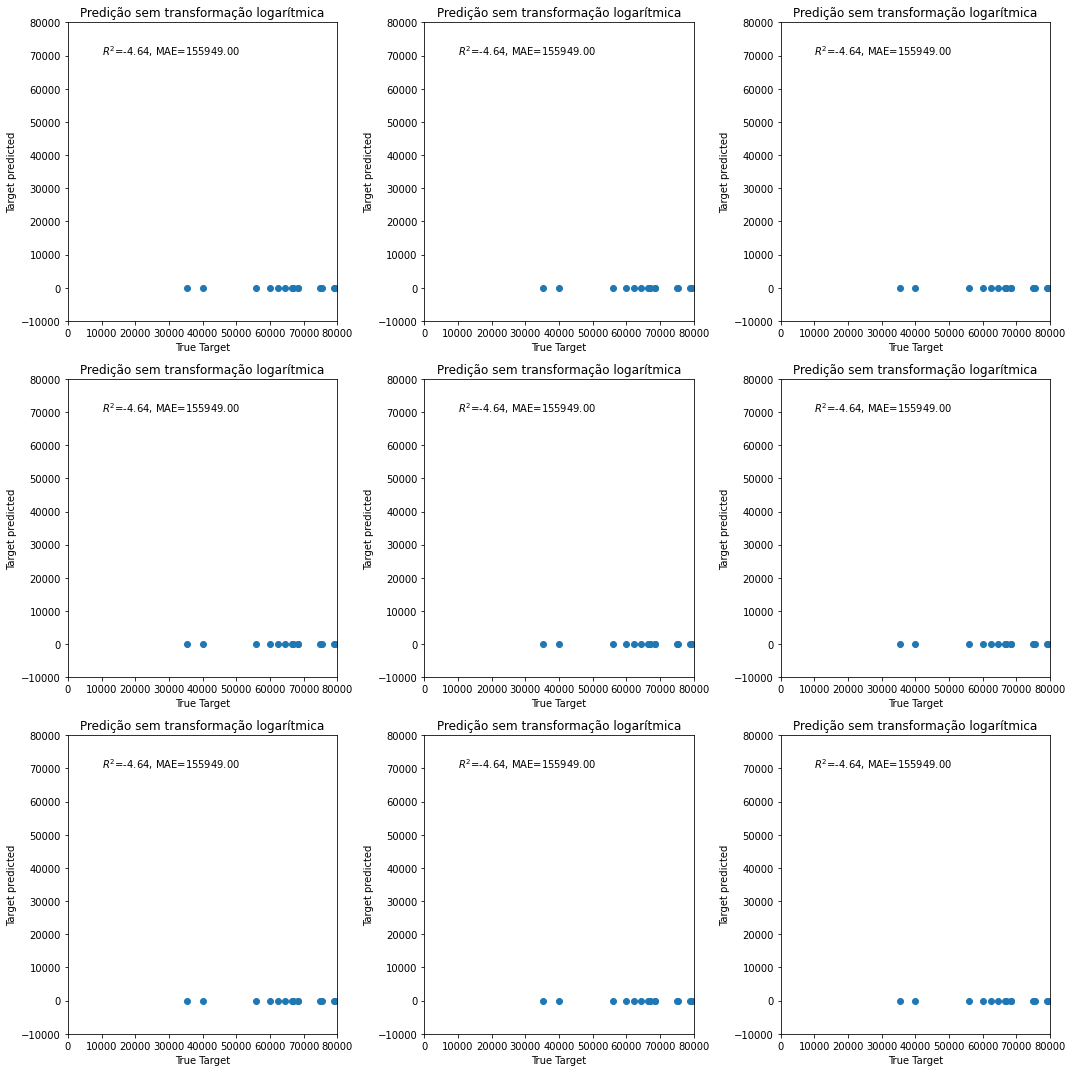

In [12]:
y_pred_data = []
for pair in models.keys():
    y_pred_data.append(predict(models[pair], X_test, y_test))


plot_target_metricts(y_test, y_pred_data)

#### Desempenho com transformação da variável alvo


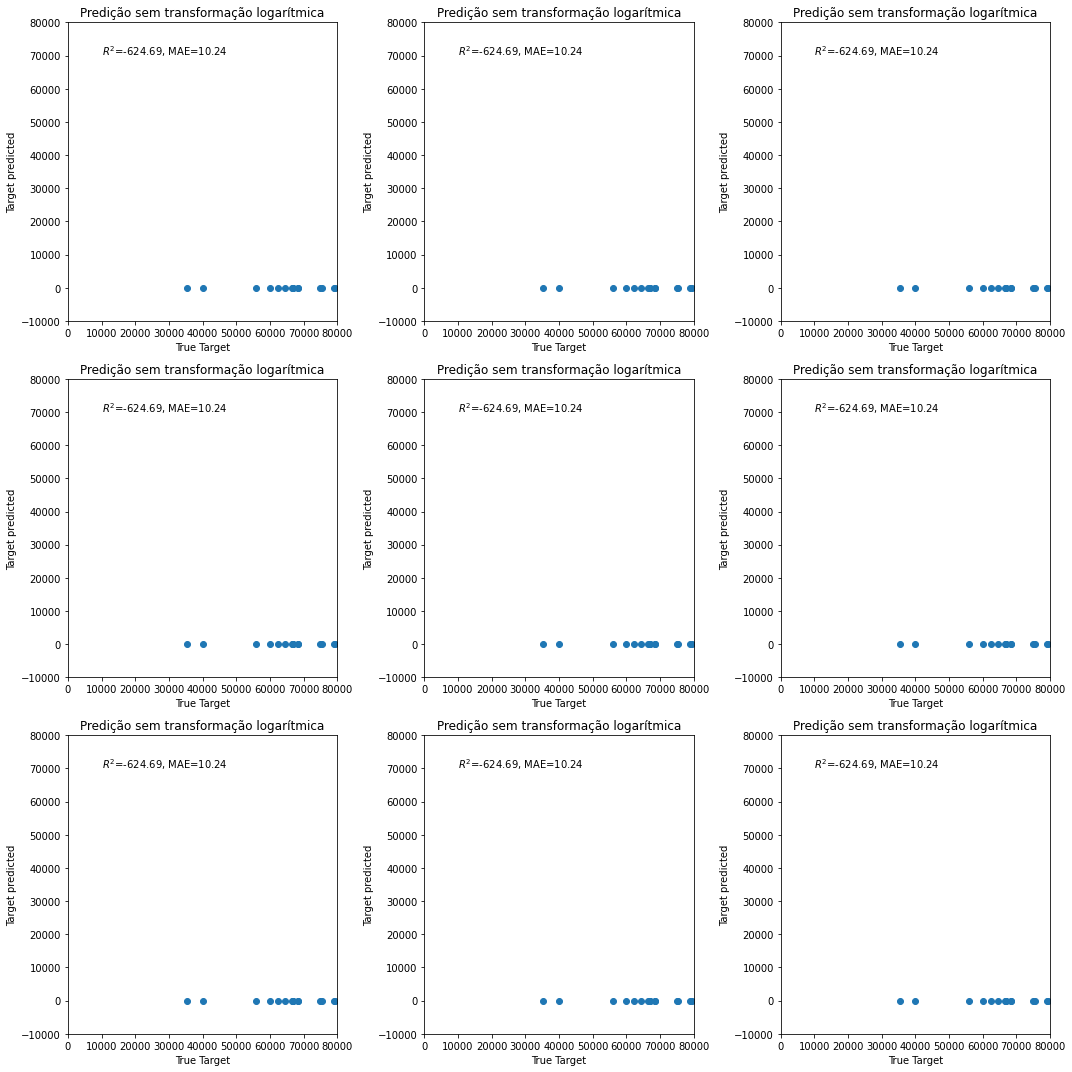

In [13]:
y_pred_data_log = []
for pair in models_log.keys():
    y_pred_data_log.append(predict(models_log[pair], X_test, y_test_log, transformed=True))

plot_target_metricts(y_test, y_pred_data_log)